# WeatherPy
---

### Analysis



In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [61]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [62]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [69]:
# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep([0.5, 1, 1.5, 1, 0.5])
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=norman wells
City not found. Skipping...
Processing Record 2 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=kaitangata
City not found. Skipping...
Processing Record 3 | Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=hualmay
City not found. Skipping...
Processing Record 4 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=cape town
City not found. Skipping...
City not found. Skipping...
Processing Record 5 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=yellowknife
City not found. Skipping...
Processing Record 6 | Punta Arenas
http://

Processing Record 47 | Umea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=umea
City not found. Skipping...
Processing Record 48 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=dikson
City not found. Skipping...
Processing Record 49 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=auki
City not found. Skipping...
Processing Record 50 | Sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=sangar
City not found. Skipping...
Processing Record 51 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=noumea
City not found. Skipping...
Processing Record 52 | Nicoya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=nicoya
City not found. Skipping...


Processing Record 95 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=tiksi
City not found. Skipping...
Processing Record 96 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=kruisfontein
City not found. Skipping...
Processing Record 97 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=quatre cocos
City not found. Skipping...
Processing Record 98 | Port-Cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=port-cartier
City not found. Skipping...
Processing Record 99 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=vaini
City not found. Skipping...
Processing Record 100 | Rtishchevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373d

Processing Record 142 | Karnobat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=karnobat
City not found. Skipping...
City not found. Skipping...
Processing Record 143 | Rio Gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=rio gallegos
City not found. Skipping...
Processing Record 144 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=souillac
City not found. Skipping...
Processing Record 145 | Uarini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=uarini
City not found. Skipping...
Processing Record 146 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=airai
City not found. Skipping...
Processing Record 147 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5

Processing Record 188 | Zhaoyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=zhaoyuan
City not found. Skipping...
Processing Record 189 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=zhangye
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 190 | Itaituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=itaituba
City not found. Skipping...
Processing Record 191 | Stavern
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=stavern
City not found. Skipping...
Processing Record 192 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=petropavlovsk-kamchatskiy
City not found. Skipping...
Processing Record 193 | Raymond
http://api.openwe

City not found. Skipping...
Processing Record 235 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=lavrentiya
City not found. Skipping...
Processing Record 236 | Dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=dudinka
City not found. Skipping...
Processing Record 237 | Kilindoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=kilindoni
City not found. Skipping...
Processing Record 238 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=kavieng
City not found. Skipping...
Processing Record 239 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=college
City not found. Skipping...
Processing Record 240 | Ontario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d543

Processing Record 281 | Vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=vila
City not found. Skipping...
Processing Record 282 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=saldanha
City not found. Skipping...
Processing Record 283 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=cherskiy
City not found. Skipping...
Processing Record 284 | Salinas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=salinas
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 285 | Porto Novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=porto novo
City not found. Skipping...
City not found. Skipping...
Processing Record 286 | Lasa


Processing Record 329 | Akureyri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=akureyri
City not found. Skipping...
Processing Record 330 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=ucluelet
City not found. Skipping...
Processing Record 331 | Smolenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=smolenka
City not found. Skipping...
Processing Record 332 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=san cristobal
City not found. Skipping...
Processing Record 333 | Aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=aswan
City not found. Skipping...
Processing Record 334 | Montes Altos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df

Processing Record 378 | Miles City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=miles city
City not found. Skipping...
Processing Record 379 | Morozovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=morozovsk
City not found. Skipping...
Processing Record 380 | Atbasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=atbasar
City not found. Skipping...
Processing Record 381 | Kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=kaeo
City not found. Skipping...
Processing Record 382 | Aleksandriya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=aleksandriya
City not found. Skipping...
Processing Record 383 | Marsa Matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df

Processing Record 425 | Cocorit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=cocorit
City not found. Skipping...
Processing Record 426 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=comodoro rivadavia
City not found. Skipping...
Processing Record 427 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=port blair
City not found. Skipping...
Processing Record 428 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=yar-sale
City not found. Skipping...
Processing Record 429 | Surt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=surt
City not found. Skipping...
Processing Record 430 | Macusani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422c

Processing Record 472 | Raton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=raton
City not found. Skipping...
Processing Record 473 | San Felipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=san felipe
City not found. Skipping...
Processing Record 474 | Santa Rosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=santa rosa
City not found. Skipping...
Processing Record 475 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=adrar
City not found. Skipping...
Processing Record 476 | Carlsbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=carlsbad
City not found. Skipping...
Processing Record 477 | Kysyl-Syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=ky

Processing Record 520 | Plouzane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=plouzane
City not found. Skipping...
Processing Record 521 | Ainazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=ainazi
City not found. Skipping...
Processing Record 522 | Iisalmi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=iisalmi
City not found. Skipping...
City not found. Skipping...
Processing Record 523 | Ko Samui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=ko samui
City not found. Skipping...
Processing Record 524 | Caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad4413422cb373df756078&q=caravelas
City not found. Skipping...
Processing Record 525 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd6d5438a1ad441

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [71]:
# Save data frame to CSV
weather_data.to_csv = "output_data/weather_data.csv"

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Norman Wells,90,CA,1556578800,26,65.28,-126.83,44.60,13.87
1,Kaitangata,18,NZ,1556581633,59,-46.28,169.85,53.01,11.01
2,Hualmay,100,PE,1556581754,90,-11.10,-77.61,67.91,15.01
3,Cape Town,0,ZA,1556581565,93,-33.93,18.42,61.00,1.12
4,Yellowknife,75,CA,1556581377,43,62.45,-114.38,15.80,20.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

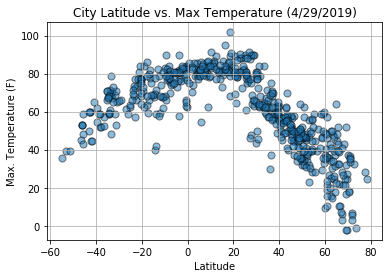

In [72]:

# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o', s=50, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (4/29/2019)')
plt.ylabel('Max. Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("Images/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

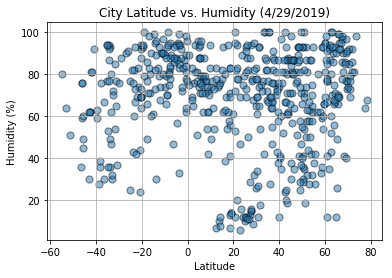

In [73]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o', s=50, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (4/29/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("Images/Max_Temp_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

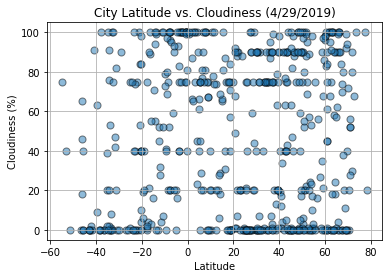

In [74]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o', s=50, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (4/29/2019)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("Images/Max_Temp_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot


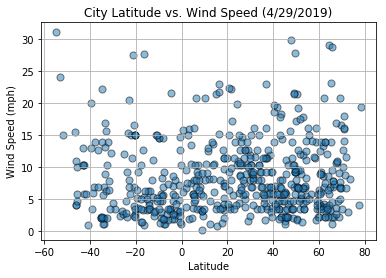

In [75]:
# Build a scatter plot for each data type
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o', s=50, alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (4/29/2019)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("Images/Max_Temp_vs_Wind_Speed.png")

# Show plot
plt.show()